Disciplina: Aprendizagem de Máquina Probabilística

Período: 2025.2

Professor: César Lincoln Cavalcante Mattos

Aluno: Davi Teixeira Silva

# Lista 1 - Modelos generativos discretos Beta-Bernoulli e Bernoulli Naive Bayes Bayesiano

## Questão 1

Você joga uma moeda 10 vezes, observando 8 vezes o resultado cara (X = 1). Considerando um modelo Beta-Bernoulli:
- Calcule a probabilidade θ dessa moeda dar cara (X = 1) considerando uma estimação: (i) ML; (ii) MAP; (iii) média da posteriori (solução Bayesiana).
- Plote as distribuições (priori e posteriori) e a verossimilhança desse modelo considerando as priori p(θ) = Beta(θ|a = 1, b = 1) e p(θ) = Beta(θ|a = 2, b = 2).

----- Beta(1,1) -----
MLE (X/N): 0.800000
MAP (posterior mode): 0.800000
Posterior mean (E[θ|D]): 0.750000
Posterior parameters: a_post = 9, b_post = 3

----- Beta(2,2) -----
MLE (X/N): 0.800000
MAP (posterior mode): 0.750000
Posterior mean (E[θ|D]): 0.714286
Posterior parameters: a_post = 10, b_post = 4



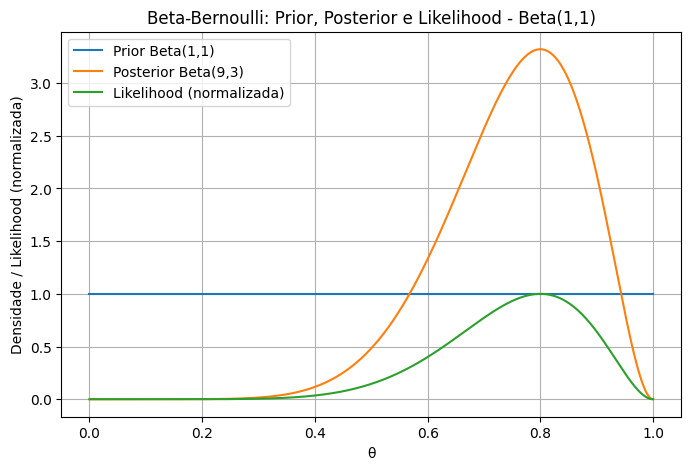

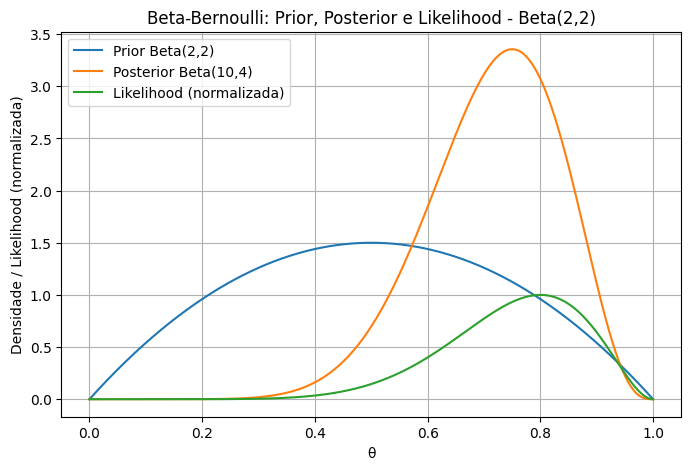


Tabela de estimativas (Questão 1):
       Prior  MLE   MAP  Posterior mean  a_post  b_post
0  Beta(1,1)  0.8  0.80        0.750000       9       3
1  Beta(2,2)  0.8  0.75        0.714286      10       4


In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Experimento de lançar uma moeda 10 vezes e observar 8 caras.

# Parâmetros do experimento
N = 10      # número de lançamentos
X = 8       # número de caras observadas

# Distribuições Beta como prioris:
# Beta(1,1) = distribuição uniforme (nenhuma preferência inicial).
# Beta(2,2) = levemente inclinada para valores de θ próximos de 0.5.
priors = [
    {"a": 1, "b": 1, "label": "Beta(1,1)"},
    {"a": 2, "b": 2, "label": "Beta(2,2)"}
]

# Funções auxiliares

# Função Beta (normalizadora da distribuição Beta):
def beta_func(alpha, beta):
    # Beta(α,β) = Γ(α) Γ(β) / Γ(α+β)
    return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)

# PDF da Beta (densidade da Beta para cada valor de θ):
def beta_pdf(theta, alpha, beta):
    # PDF da Beta para array theta
    # Para evitar theta==0 ou 1 extremos ao computar potências: usamos np.clip
    t = np.clip(theta, 1e-12, 1-1e-12)
    return (t**(alpha-1) * (1-t)**(beta-1)) / beta_func(alpha, beta)

# Likelihood binomial:
def binomial_likelihood(theta, N, X):
    # Likelihood P(X | theta) = C(N,X) * theta^X * (1-theta)^(N-X)
    # Aqui vamos devolver a likelihood como função de theta (array)
    coef = math.comb(N, X)
    t = np.clip(theta, 1e-12, 1-1e-12)
    return coef * (t**X) * ((1-t)**(N-X))

# Grid de theta para plot
# Criamos 1001 pontos igualmente espaçados entre 0 e 1 para avaliar as distribuições (grid para os gráficos).
theta = np.linspace(0, 1, 1001)

resultados = []

for prior in priors:
    a = prior["a"]
    b = prior["b"]
    label = prior["label"]

    # Calculo para a MLE de Bernoulli(estimativa de máxima verossimilhança):
    mle = X / N # 8/10 = 0.8

    # Calculos para os parâmetros da posterior:
    a_post = a + X
    b_post = b + (N - X)

    # Calcula MAP (modo da posterior).
    # (se a_post > 1 e b_post > 1)
    if a_post > 1 and b_post > 1:
        map_est = (a_post - 1) / (a_post + b_post - 2)
    else:
        # Se um dos parâmetros <= 1, o modo está no limite (0 ou 1); usar fallback
        map_est = (a_post - 1) / (a_post + b_post - 2) if (a_post + b_post - 2) != 0 else float('nan')

    # Calculo para a Média da posterior (esperança)
    posterior_mean = a_post / (a_post + b_post)

    # PDFs e likelihood
    prior_pdf = beta_pdf(theta, a, b)
    posterior_pdf = beta_pdf(theta, a_post, b_post)
    likelihood = binomial_likelihood(theta, N, X)

    # Para plot: normalizar likelihood para que fique na mesma escala
    likelihood_norm = likelihood / np.max(likelihood)

    resultados.append({
        "prior": prior,
        "mle": mle,
        "map": map_est,
        "posterior_mean": posterior_mean,
        "a_post": a_post,
        "b_post": b_post,
        "theta": theta,
        "prior_pdf": prior_pdf,
        "posterior_pdf": posterior_pdf,
        "likelihood": likelihood,
        "likelihood_norm": likelihood_norm
    })

    # Exibir valores numéricos
    print("-----", label, "-----")
    print(f"MLE (X/N): {mle:.6f}")
    print(f"MAP (posterior mode): {map_est:.6f}")
    print(f"Posterior mean (E[θ|D]): {posterior_mean:.6f}")
    print(f"Posterior parameters: a_post = {a_post}, b_post = {b_post}\n")

# Plot: um gráfico por prior (cada gráfico mostra priori, posterior e likelihood normalizada)
for res in resultados:
    plt.figure(figsize=(8,5))
    plt.plot(res["theta"], res["prior_pdf"], label=f'Prior {res["prior"]["label"]}')
    plt.plot(res["theta"], res["posterior_pdf"], label=f'Posterior Beta({res["a_post"]},{res["b_post"]})')
    plt.plot(res["theta"], res["likelihood_norm"], label='Likelihood (normalizada)')
    plt.xlabel('θ')
    plt.ylabel('Densidade / Likelihood (normalizada)')
    plt.title(f'Beta-Bernoulli: Prior, Posterior e Likelihood - {res["prior"]["label"]}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Além disso, mostrar as três estimativas em uma tabela simples
import pandas as pd
table_rows = []
for res in resultados:
    table_rows.append({
        "Prior": res["prior"]["label"],
        "MLE": res["mle"],
        "MAP": res["map"],
        "Posterior mean": res["posterior_mean"],
        "a_post": res["a_post"],
        "b_post": res["b_post"]
    })

df = pd.DataFrame(table_rows)
print("\nTabela de estimativas (Questão 1):")
print(df)

## Questão 2

Implemente um modelo de Bernoulli Naive Bayes Bayesiano considerando os dados disponíveis em cleaned reviews.csv. Os dados consistem de reviews em texto (segunda coluna) da Amazon, classificados como positive, negative e neutral (primeira coluna). Ignore as demais colunas.

Use uma codificação bag-of-words, em que cada palavra é um atributo, com valor 0 (ausente) ou 1 (presente). Você pode usar o código abaixo como base:

In [ ]:
import pandas as pd
from sklearn . feature_extraction . text import CountVectorizer
from sklearn . preprocessing import LabelEncoder
data = pd . read_csv ( " cleaned_reviews . csv " ). dropna ()
y = LabelEncoder (). fit_transform ( data . sentiments )
...
# split train - test
...
encoder = CountVectorizer ( binary = True ). fit ( x_train )
x_train = encoder . transform ( x_train )
x_test = encoder . transform ( x_test )

Considerando 20 repetições aleatórias em que, para cada rodada, somente 1000 observações são usadas para treinamento e o restante para teste (escolhidos aleatoriamente):

- Mostre a média e o desvio padrão da acurácia do modelo no teste para a priori p(θ) = Beta(θ|a = 1, b = 1), em que θ é o parâmetro da verossimilhança de Bernoulli dos atributos.
- Repita o item anterior para as priori p(θ) = Beta(θ|a = 0.5, b = 0.5) e p(θ) = Beta(θ|a = 2, b = 2).

In [1]:
import re
import numpy as np
import pandas as pd

# Carregar dados
data = pd.read_csv("cleaned_reviews.csv").dropna() #dropna para remover os valores nulos

labels = data.iloc[:,0].astype(str).tolist()  # primeira coluna: sentiments
texts = data.iloc[:,1].astype(str).tolist()   # segunda coluna: reviews

# Codificar labels
classes = list(sorted(set(labels))) # Cria uma lista de classes possíveis ('negative', 'positive')
label2id = {c:i for i,c in enumerate(classes)} # converte a classe para número ('negative':0, 'positive':1)
y = np.array([label2id[l] for l in labels]) # vira um array NumPy só com os rótulos numéricos

# Construir vocabulário (Bag-of-Words)
# transforma texto em lista de palavras (minúsculas, remove pontuação).
def tokenize(text):
    return re.findall(r"\b\w+\b", text.lower())

vocab = set() # conjunto de todas as palavras que aparecem nos textos.
for t in texts:
    vocab.update(tokenize(t))
vocab = sorted(list(vocab))
word2id = {w:i for i,w in enumerate(vocab)} # Ordena e cria um mapeamento palavra → índice

# Cria a matriz Bag-of-Words binária:
X = np.zeros((len(texts), len(vocab)), dtype=np.int8)
for i,t in enumerate(texts):
    for w in set(tokenize(t)):
        if w in word2id:
            X[i, word2id[w]] = 1

print("Matriz X:", X.shape)   # nº docs x nº palavras
print("Classes:", classes)

# Treinamento do Naive Bayes
def fit_naive_bayes(X_train, y_train, a=1.0, b=1.0):
    n_classes = len(set(y_train))
    n_features = X_train.shape[1]

    # Probabilidades a priori das classes
    class_counts = np.bincount(y_train, minlength=n_classes)
    class_priors = class_counts / len(y_train) # probabilidade a priori de cada classe.

    # Parâmetros Beta posterior para cada classe e palavra
    theta = np.zeros((n_classes, n_features))
    for c in range(n_classes):
        X_c = X_train[y_train == c]
        Nc = len(X_c) # nº docs dessa classe.
        Nj = np.sum(X_c, axis=0)  # nº docs na classe c onde cada palavra aparece
        theta[c] = (Nj + a) / (Nc + a + b) # é a suavização Beta-Bernoulli (evita zeros).

    return class_priors, theta # probabilidades das classes) e theta (probabilidades de palavras dado a classe).

# Predição
def predict_naive_bayes(X_test, class_priors, theta):
    n_classes = len(class_priors)
    log_priors = np.log(class_priors + 1e-12)
    log_probs = []

    # Calcula log da verossimilhança de cada classe
    for x in X_test:
        # log(P(y=c)) + soma_j log(P(x_j|c)) ou log(1-P(x_j|c))
        log_c = []
        for c in range(n_classes):
            p = theta[c]
            log_likelihood = np.sum(x * np.log(p + 1e-12) + (1-x) * np.log(1-p + 1e-12))
            log_c.append(log_priors[c] + log_likelihood)
        log_probs.append(np.argmax(log_c))

    return np.array(log_probs)

# Avaliação com treino/teste aleatório
def evaluate_nb(X, y, a, b, n_rounds=20, train_size=1000):
    accs = []
    n = len(y)
    # Roda n_rounds vezes (20 por padrão)
    for _ in range(n_rounds):
        idx = np.random.permutation(n)
        train_idx = idx[:train_size]
        test_idx = idx[train_size:]

        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]

        class_priors, theta = fit_naive_bayes(X_train, y_train, a, b)
        y_pred = predict_naive_bayes(X_test, class_priors, theta)
        acc = np.mean(y_pred == y_test)
        accs.append(acc)

    # Retorna a média e desvio padrão da acurácia
    return np.mean(accs), np.std(accs)

# Testar para as três prioris
# Beta(1,1) - uniforme (nenhum viés).
# Beta(0.5,0.5) - prior que favorece extremos (θ perto de 0 ou 1).
# Beta(2,2) - prior mais centralizado (θ perto de 0.5).
priors = [(1,1), (0.5,0.5), (2,2)]
for a,b in priors:
    mean_acc, std_acc = evaluate_nb(X, y, a, b)
    print(f"Prior Beta({a},{b}) -> Acurácia média: {mean_acc:.4f}, desvio padrão: {std_acc:.4f}")


Matriz X: (17337, 9593)
Classes: ['negative', 'neutral', 'positive']
Prior Beta(1,1) -> Acurácia média: 0.6087, desvio padrão: 0.0403
Prior Beta(0.5,0.5) -> Acurácia média: 0.6850, desvio padrão: 0.0236
Prior Beta(2,2) -> Acurácia média: 0.5486, desvio padrão: 0.0031


## Conclusão

Nesta lista, aprendi como funciona a abordagem Bayesiana em problemas de inferência e classificação. Na primeira questão, explorei o modelo Beta-Bernoulli, entendendo como diferentes escolhas de priors (Beta(1,1), Beta(2,2)) influenciam a forma da posterior e as estimativas de parâmetros como MLE, MAP e a média da posterior. Com isso, consegui enxergar a importância de combinar dados observados com crenças iniciais e como isso afeta os resultados.

Na segunda questão, implementei um Naive Bayes Bayesiano para classificar sentimentos de reviews da Amazon, utilizando bag-of-words binário. Foi interessante ver como a suavização via distribuições Beta (com diferentes hiperparâmetros) afeta a probabilidade de palavras e, consequentemente, a acurácia do modelo. Além disso, a prática de realizar várias repetições aleatórias mostrou a importância de avaliar a robustez do modelo em diferentes divisões de treino e teste.

De forma geral, a lista serviu para entender sobre como a inferência Bayesiana pode ser aplicada tanto em modelos simples de inferência de parâmetros quanto em classificadores de texto.